Phase 1 : Importing and Exploring data  

In [174]:
import pandas as pd 
import numpy as np
data = pd.read_csv('hospital_readmissions.csv')
df = pd.DataFrame(data)
df.tail()      

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no
24999,[50-60),10,37,1,24,0,0,0,Missing,Other,Diabetes,Circulatory,no,no,no,no,yes


In [175]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [176]:
# Summary statistics for numerical features
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [177]:
# Check for missing values
print(df.isnull().sum())
duplicates = df.duplicated()
print(duplicates.sum())


age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64
0


Phase 2 : Exploratory Data Analysis 

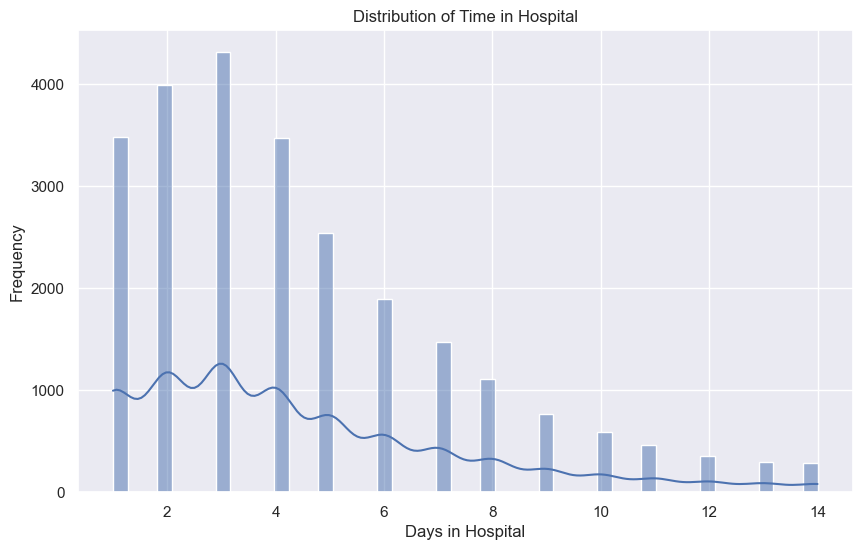

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(df['time_in_hospital'], kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='n_emergency', ylabel='Count'>

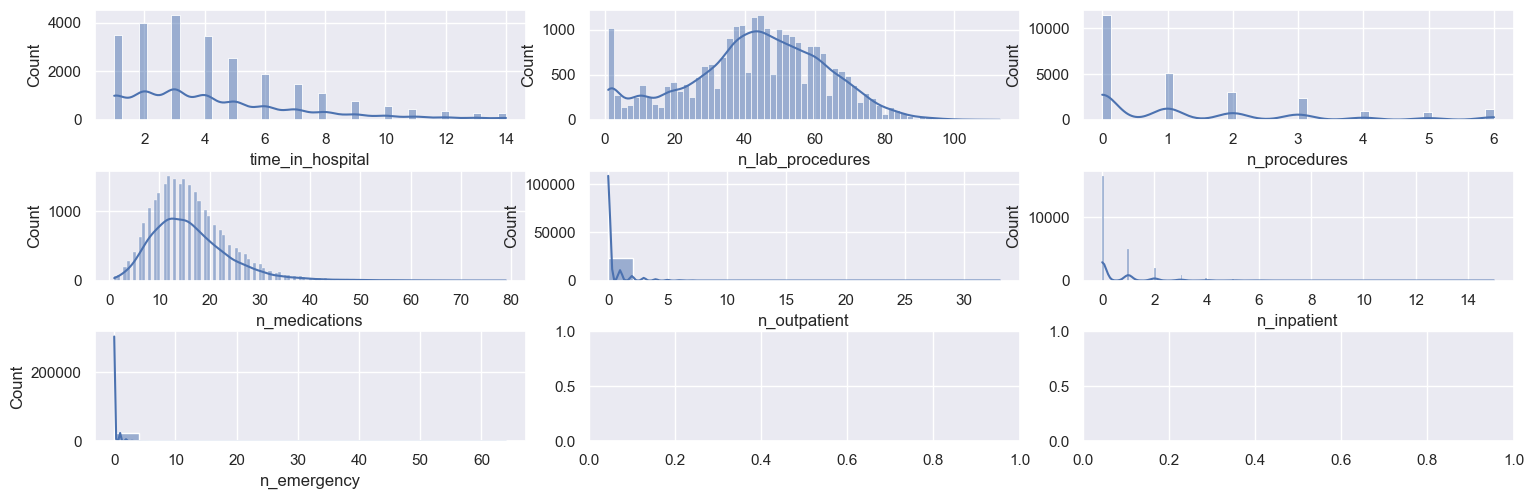

In [194]:
fig, axs = plt.subplots(3, 3, figsize=(15, 5))
fig.tight_layout()

sns.histplot(data = df, x = 'time_in_hospital', ax = axs[0, 0], kde = True)
sns.histplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1], kde = True)
sns.histplot(data = df, x = 'n_procedures', ax = axs[0, 2], kde = True)
sns.histplot(data = df, x = 'n_medications', ax = axs[1, 0], kde = True)
sns.histplot(data = df, x = 'n_outpatient', ax = axs[1, 1], kde = True)
sns.histplot(data = df, x = 'n_inpatient', ax = axs[1, 2], kde = True)
sns.histplot(data = df, x = 'n_emergency', ax = axs[2, 0], kde = True)

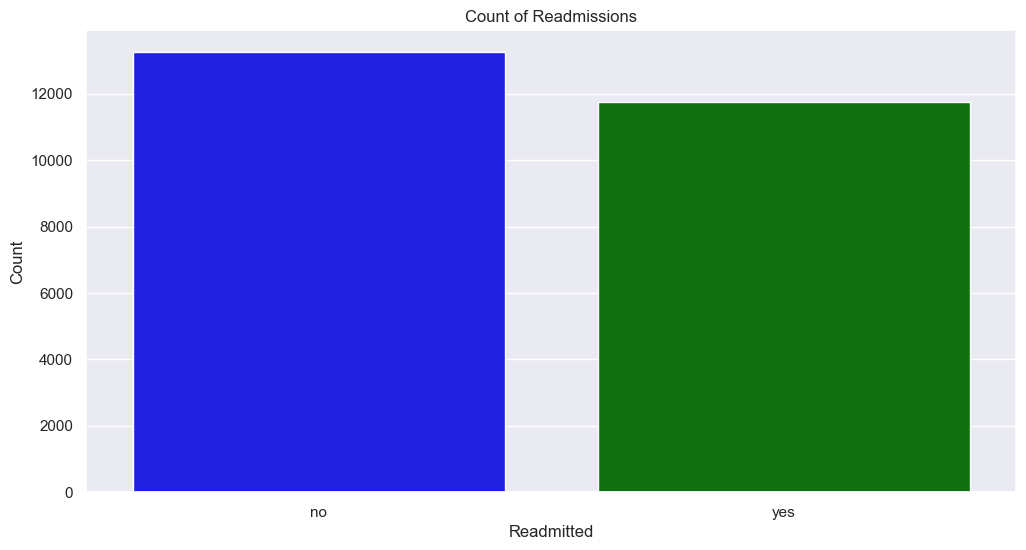

In [179]:
plt.figure(figsize=(12, 6))
sns.countplot(x='readmitted', data=df, palette=['blue', 'green'], legend= False, hue='readmitted')
plt.title('Count of Readmissions')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


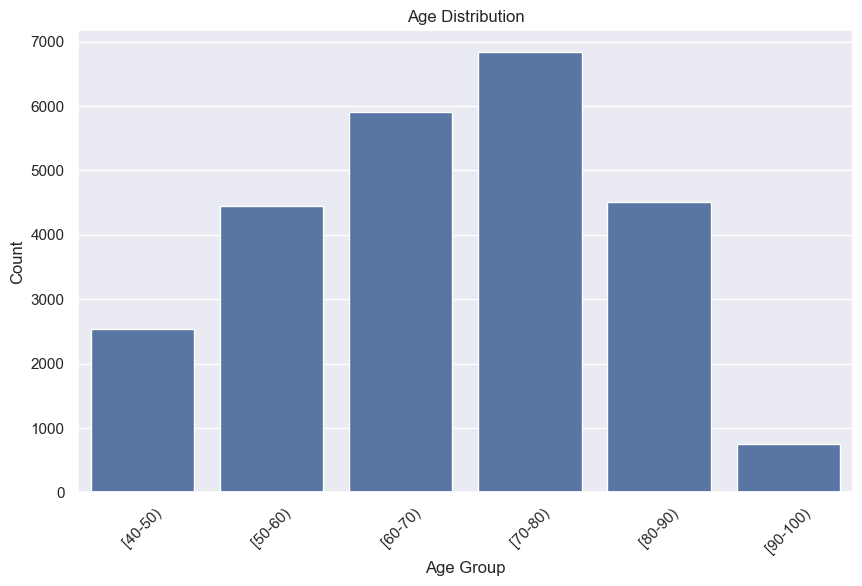

In [180]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, order=sorted(df['age'].unique()))
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

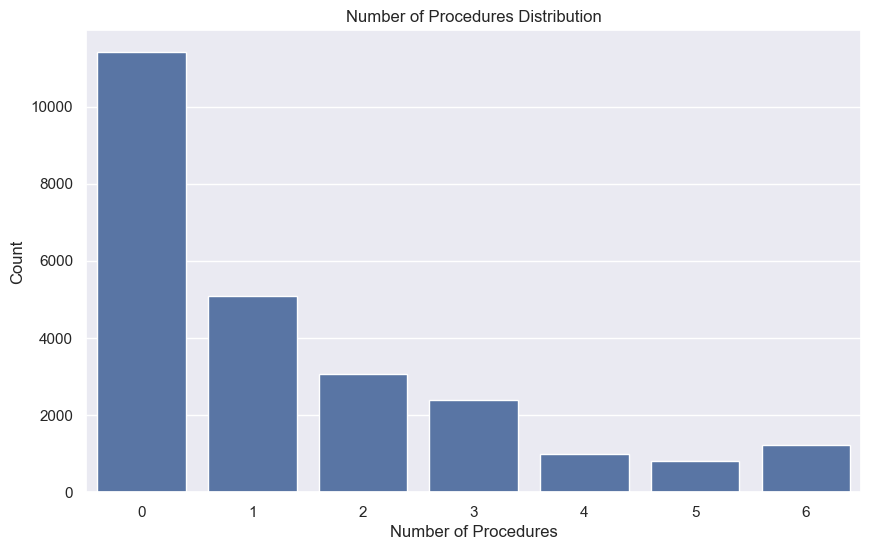

In [181]:
plt.figure(figsize=(10, 6))
sns.countplot(x='n_procedures', data=df)
plt.title('Number of Procedures Distribution')
plt.xlabel('Number of Procedures')
plt.ylabel('Count')
plt.show()


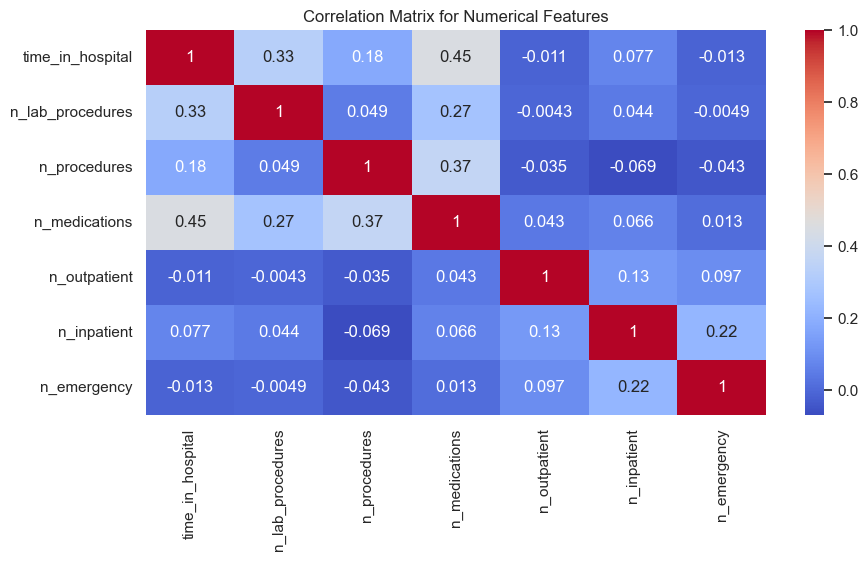

In [182]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix for numerical features only
corr_matrix_numerical = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

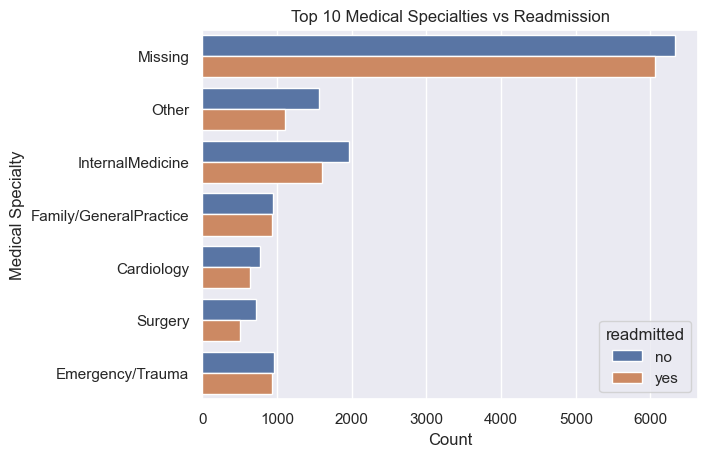

In [183]:
top_specialties = df['medical_specialty'].value_counts().nlargest(10).index
filtered_data = df[df['medical_specialty'].isin(top_specialties)]
sns.countplot(y='medical_specialty', hue='readmitted', data=filtered_data)
plt.title('Top 10 Medical Specialties vs Readmission')
plt.xlabel('Count')
plt.ylabel('Medical Specialty')
plt.show()


Phase 3 : Data Preprossecing 

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Separating features and target variable
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [185]:
#Encoding
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Phase 4: Training Models

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()

# Train the models
logistic_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
gradient_boosting_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [187]:
#Predict And Evaluate
# Function to evaluate models
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, clf_report, conf_matrix

# Evaluate Logistic Regression
logistic_accuracy, logistic_clf_report, logistic_conf_matrix = evaluate_model(logistic_model, X_test_scaled, y_test)

# Evaluate Random Forest
rf_accuracy, rf_clf_report, rf_conf_matrix = evaluate_model(random_forest_model, X_test_scaled, y_test)

# Evaluate Gradient Boosting
gb_accuracy, gb_clf_report, gb_conf_matrix = evaluate_model(gradient_boosting_model, X_test_scaled, y_test)


In [188]:
#Compare Models
# Print the evaluation metrics for each model
print("Logistic Regression Accuracy:", logistic_accuracy)
print(logistic_clf_report)
print(logistic_conf_matrix)

print("\nRandom Forest Accuracy:", rf_accuracy)
print(rf_clf_report)
print(rf_conf_matrix)

print("\nGradient Boosting Accuracy:", gb_accuracy)
print(gb_clf_report)
print(gb_conf_matrix)


Logistic Regression Accuracy: 0.6016
              precision    recall  f1-score   support

          no       0.60      0.78      0.68      2680
         yes       0.61      0.39      0.48      2320

    accuracy                           0.60      5000
   macro avg       0.60      0.59      0.58      5000
weighted avg       0.60      0.60      0.59      5000

[[2096  584]
 [1408  912]]

Random Forest Accuracy: 0.6044
              precision    recall  f1-score   support

          no       0.62      0.68      0.65      2680
         yes       0.58      0.52      0.55      2320

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000

[[1823  857]
 [1121 1199]]

Gradient Boosting Accuracy: 0.609
              precision    recall  f1-score   support

          no       0.61      0.73      0.67      2680
         yes       0.60      0.47      0.53      2320

    accuracy            

In [189]:
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [logistic_accuracy, rf_accuracy, gb_accuracy],
    # Add other metrics like Precision, Recall, F1-Score here
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Model', inplace=True)

print(metrics_df)

                     Accuracy
Model                        
Logistic Regression    0.6016
Random Forest          0.6044
Gradient Boosting      0.6090


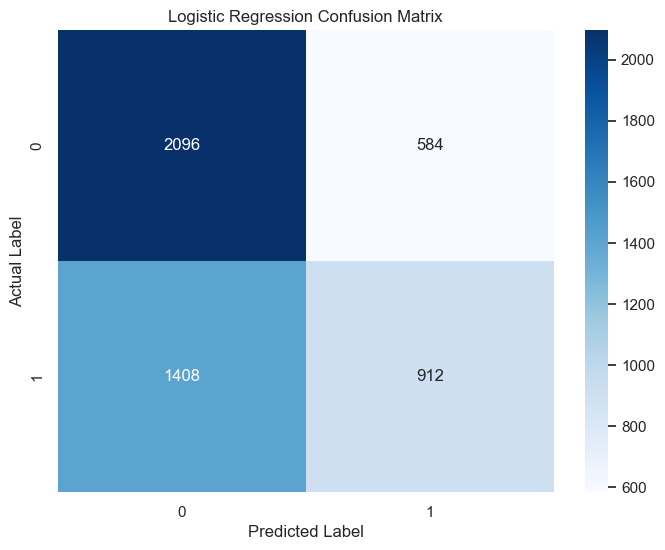

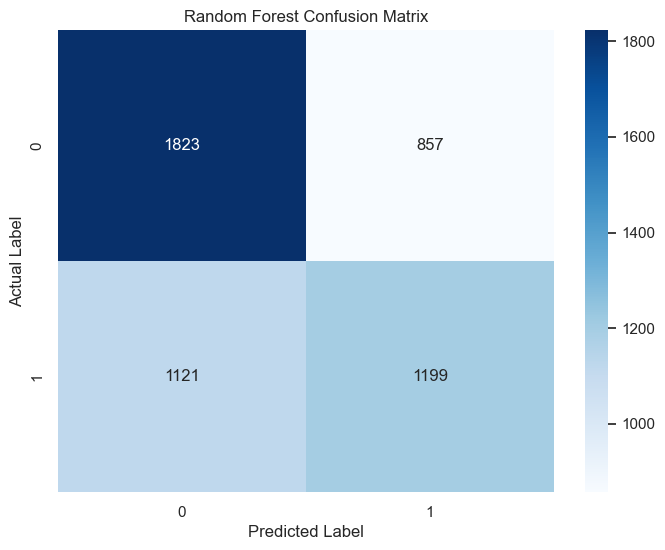

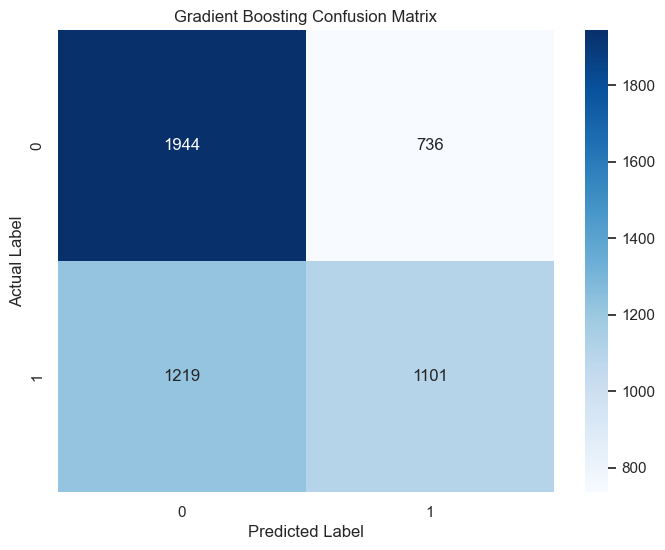

In [190]:

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(logistic_conf_matrix, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(rf_conf_matrix, 'Random Forest Confusion Matrix')
plot_confusion_matrix(gb_conf_matrix, 'Gradient Boosting Confusion Matrix')
